# CC3001 2023-1 - Tarea 6: Quicksort
# Nombre: Valentina Alarcón Y.
Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la primera, el método de partición debe elegir el pivote como el primer elemento del sub arreglo que está particionando. En la segunda, el pivote debe elegirse como la mediana entre el primero, el del medio y el último elemento. Usted debe entregar un link a su tarea en `colab`.

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
# Para el item de comparaciones, crearemos dos variables globales que almacenen la cantidad buscada
# De acuerdo al método utilizado
contador_qs = 0
contador_qs3 = 0

def quicksort(a):
    qsort(a,0,len(a)-1)

def qsort(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k=particion(a,i,j)
        qsort(a,i,k-1)
        qsort(a,k+1,j)


def particion(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
    # a[i] es el pivote
    # para contar las comparaciones:
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    global contador_qs
    for t in range(s,j):
        contador_qs += 1
        if a[t+1]<=a[i]:
            (a[s+1],a[t+1])=(a[t+1],a[s+1])
            s=s+1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)

[0.83363956 0.73119243 0.00178298 0.02869565 0.05722011 0.55263889
 0.56425412 0.02047658 0.85035471 0.8981872  0.66269982 0.10589184
 0.1367046  0.59367435 0.88653386 0.76389336 0.97329859 0.19915611
 0.10677626 0.59069712 0.15754067 0.54135669 0.45042508 0.14124281
 0.22281095 0.17438681 0.35119782 0.18881143 0.68099943 0.88675805]
Desordenado
[0.00178298 0.02047658 0.02869565 0.05722011 0.10589184 0.10677626
 0.1367046  0.14124281 0.15754067 0.17438681 0.18881143 0.19915611
 0.22281095 0.35119782 0.45042508 0.54135669 0.55263889 0.56425412
 0.59069712 0.59367435 0.66269982 0.68099943 0.73119243 0.76389336
 0.83363956 0.85035471 0.88653386 0.88675805 0.8981872  0.97329859]
Ordenado


# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
#version encontrando 3 elementos al azar
import random
def quicksort3(a):
  qsort3(a,0,len(a)-1)

def qsort3(a,i,j): # ordena a[i],...,a[j]
  if len(a) == 0:
    # dado que el arreglo es de tamaño 0, ya se encuentra ordenado
    pass
  elif len(a) == 1:
    # dado que el arreglo es de tamaño 1, ya se encuentra ordenado
    pass
  elif len(a) == 2:
    if a[0]>a[1]:
      (a[0],a[1])=(a[1],a[0])
  else:
    if i<j: # quedan 2 o más elementos por ordenar
        k=particionMedianaDe3(a,i,j)
        qsort3(a,i,k-1)
        qsort3(a,k+1,j)

  # aquí debería dividir para tomar en cuenta los casos borde: arreglos de tamaño 0,1,2
  # aplicar qsort recursivo solo a arreglos de tamaño mayor o igual a 3

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
  m = min(a[i],a[(j+i)//2],a[j])
  if m == a[i]:
    if a[(j+i)//2]>a[j]:
      medio = a[j]
      mayor = a[(j+i)//2]
    else:
      medio = a[(j+i)//2]
      mayor = a[j]
  elif m == a[(j+i)//2]:
    if a[i]>a[j]:
      medio = a[j]
      mayor = a[i]
    else:
      medio = a[i]
      mayor = a[j]
  else: # m == a[j]
    if a[i]>a[(j+i)//2]:
      medio = a[(j+i)//2]
      mayor = a[i]
    else:
      medio = a[i]
      mayor = a[(j+i)//2]
  a[i] = m
  a[j] = mayor
  a[i+1] = medio
  # ahora, uso a[i+1] como pivote

  # a[i+1] es el pivote
  s=i+1 # invariante: a[i+2..s]<=a[i+1], a[s+1..t]>a[i+1]
  global contador_qs3
  for t in range(s,j):
      contador_qs3 +=1
      if a[t+1]<=a[i+1]:
          (a[s+1],a[t+1])=(a[t+1],a[s+1])
          s=s+1
  # mover pivote al centro
  (a[i+1],a[s])=(a[s],a[i+1])
  return s

# Luego, se aplica el algoritmo de partición ya conocido al segmento  a[i+2],…,a[j−1] ,
#con  a[i+1]  como pivote.
# Al terminar, el pivote se mueve al centro y se retorna su posición.

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)

[0.4601646  0.44407926 0.50039777 0.39898932 0.27848487 0.52743476
 0.75811839 0.65887218 0.61672826 0.86106978 0.61921006 0.98335518
 0.01518637 0.37593136 0.33469293 0.3812182  0.30652856 0.39801396
 0.47175967 0.3210195  0.36996678 0.144937   0.84436477 0.17490936
 0.99291483 0.66959094 0.91697985 0.44934769 0.08189472 0.25702639]
Desordenado
[0.01518637 0.144937   0.17490936 0.25702639 0.27848487 0.27848487
 0.3210195  0.33469293 0.33469293 0.33469293 0.37593136 0.37593136
 0.3812182  0.39801396 0.39898932 0.39898932 0.4601646  0.47175967
 0.50039777 0.52743476 0.52743476 0.61921006 0.65887218 0.65887218
 0.66959094 0.75811839 0.84436477 0.84436477 0.91697985 0.99291483]
Ordenado


Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

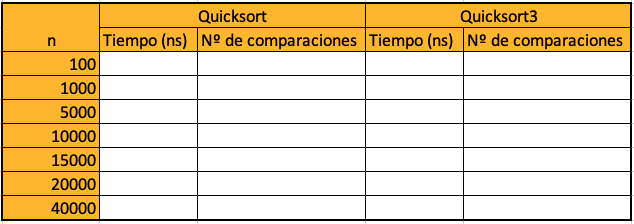


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
import time
contador_qs = 0
contador_qs3 = 0
a = np.random.random(100)
t1 = time.clock_gettime_ns(0)
quicksort3(a)
comparacion = contador_qs
comp2 = contador_qs3
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")
print(str(comparacion),str(comp2))

el tiempo que demoró el proceso fue de  851724 nanosegundos
0 560


Para contar las comparaciones puede usar variables globales que se incrementan convenientemente. Solo cuente las comparaciones que se hacen en el proceso de partición (dentro del `for`). Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

In [ ]:
import numpy as np
import time
from statistics import mean
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]

In [ ]:
def tiempo(metodo,lista_tiempos,prueba_):
  t1 = time.clock_gettime_ns(0)
  metodo(prueba_)
  t2 = time.clock_gettime_ns(0)
  if metodo == quicksort:
    print("el tiempo que demoró el proceso quicksort fue de ",(t2-t1),"nanosegundos")
  elif metodo == quicksort3:
    print("el tiempo que demoró el proceso quicksort3 fue de ",(t2-t1),"nanosegundos")
  lista_tiempos.append(t2-t1)

In [ ]:
for numero in ns:
  tiempos_qs = list()
  tiempos_qs3 = list()
  listcont_qs = list()
  listcont_qs3 = list()
  for i in range(15):
    contador_qs = 0
    contador_qs3 = 0
    prueba = np.random.random(numero)
    prueba_copy = prueba.copy()
    tiempo(quicksort,tiempos_qs,prueba)
    tiempo(quicksort3,tiempos_qs3,prueba_copy)
    print("La cantidad de comparaciones para el método quicksort fue de " + str(contador_qs))
    listcont_qs.append(contador_qs)
    print("La cantidad de comparaciones para el método quicksort3 fue de " + str(contador_qs3))
    listcont_qs3.append(contador_qs3)

  print(tiempos_qs)
  print(tiempos_qs3)
  print(listcont_qs)
  print(listcont_qs3)

  promedio_qs = mean(tiempos_qs)
  promedio_qs3 = mean(tiempos_qs3)
  promcont_qs = mean(listcont_qs)
  promcont_qs3 = mean(listcont_qs3)

  print("El promedio de tiempo para n = " + str(numero) + " para el método quicksort es " + str(promedio_qs))
  print("El promedio de tiempo para n = " + str(numero) + " para el método quicksort3 es " + str(promedio_qs3))
  print("El promedio de comparaciones para n = " + str(numero) + " para el método quicksort es " + str(promcont_qs))
  print("El promedio de comparaciones para n = " + str(numero) + " para el método quicksort3 es " + str(promcont_qs3))

el tiempo que demoró el proceso quicksort fue de  479952 nanosegundos
el tiempo que demoró el proceso quicksort3 fue de  488162 nanosegundos
La cantidad de comparaciones para el método quicksort fue de 630
La cantidad de comparaciones para el método quicksort3 fue de 456
el tiempo que demoró el proceso quicksort fue de  499602 nanosegundos
el tiempo que demoró el proceso quicksort3 fue de  526202 nanosegundos
La cantidad de comparaciones para el método quicksort fue de 740
La cantidad de comparaciones para el método quicksort3 fue de 492
el tiempo que demoró el proceso quicksort fue de  540732 nanosegundos
el tiempo que demoró el proceso quicksort3 fue de  575932 nanosegundos
La cantidad de comparaciones para el método quicksort fue de 691
La cantidad de comparaciones para el método quicksort3 fue de 537
el tiempo que demoró el proceso quicksort fue de  228451 nanosegundos
el tiempo que demoró el proceso quicksort3 fue de  319601 nanosegundos
La cantidad de comparaciones para el método

Primero haremos la tabla comparativa entre el número de iteraciones asociado tanto a la parte 1 como la parte 2

| Valores de N | Quicksort |  | Quicksort3 |  |
| --- | --- | --- | --- | --- |
|  | Tiempo (ns) | N° de comparaciones | Tiempo (ns) | N° de comparaciones |
| 100 | 502452.7 | 673 | 505664.5 |479 |
| 1000 | 7248865.4 | 10967 | 7942577.1 |8710 |
| 5000 | 44270420.3 | 70239 | 45704792.0 |57519 |
| 10000 | 95455906.6 | 158730 | 99436226 |126286 |
| 15000 | 207874947.8 | 246165 | 197435128.8 |199300 |
| 20000 | 203092566.6 | 332401 | 209149466.1 |277975 |
| 40000 | 473051005.9 | 725534 | 506199074.7 |603559 |

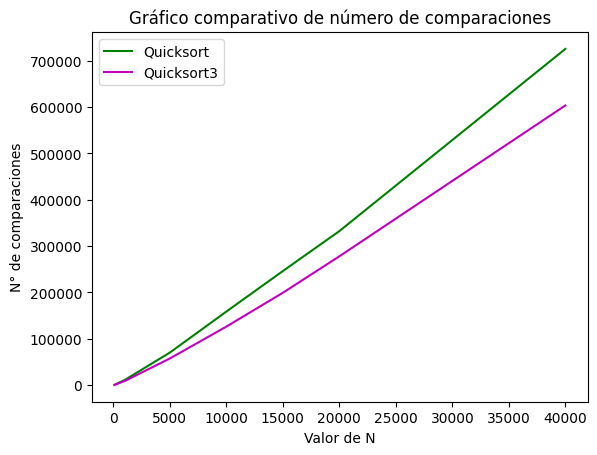

In [ ]:
#Para hacer el gráfico comparativo usaremos matplotlib
# N° de comparaciones

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#Quicksort
plt.plot([100, 1000, 5000, 10000, 15000, 20000, 40000], [673, 10967, 70239, 158730, 246165, 332401, 725534], color="g", label="Quicksort")
#Quicksort3
plt.plot([100, 1000, 5000, 10000, 15000, 20000, 40000], [479, 8710, 57519, 126286, 199300, 277975, 603559], color="m", label="Quicksort3")
plt.title("Gráfico comparativo de número de comparaciones")
plt.xlabel("Valor de N")
plt.ylabel("N° de comparaciones")
plt.legend()
plt.show()

#Es posible concluir que el método quicksort3 usa menos comparaciones en promedio que el quicksort original

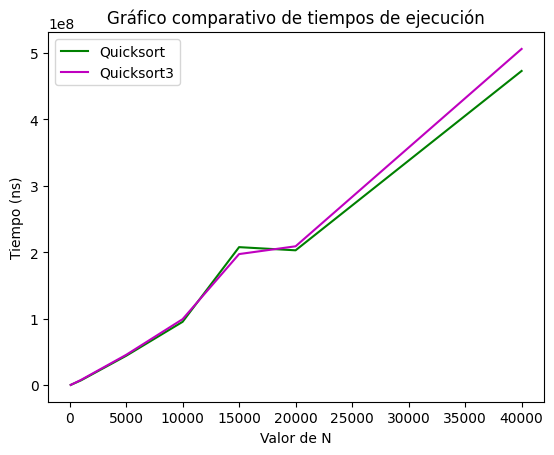

In [ ]:
# Tiempo(ns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#Quicksort
plt.plot([100, 1000, 5000, 10000, 15000, 20000, 40000], [502452.7, 7248865.4, 44270420.3, 95455906.6, 207874947.8, 203092566.6, 473051005.9], color="g", label="Quicksort")
#Quicksort3
plt.plot([100, 1000, 5000, 10000, 15000, 20000, 40000], [505664.5, 7942577.1, 45704792.0, 99436226, 197435128.8, 209149466.1, 506199074.7], color="m", label="Quicksort3")
plt.title("Gráfico comparativo de tiempos de ejecución")
plt.xlabel("Valor de N")
plt.ylabel("Tiempo (ns)")
plt.legend()
plt.show()

#Es posible concluir que el método quicksort3 se tarda un poco más que el quicksort original.
#Una posible razón para esto es el uso de la función "min"